# MÉTODO DAS DIFERENÇAS FINITAS

Método que se baseia na aproximação de derivadas por diferenças finitas. A aproximação da derivada pode ser feita com a expanção em série de Taylor como segue.

$$ f(x+h) = f(x) + h f'(x) + \frac{h^2 f''(x)}{2!} + \frac{h^3 f'''(x)}{3!} + o(h^4)$$

A derivada pode ser aproximada com o truncamento da expressão (Forward Euler).

$$ f'(x) = \frac{f(x+h)-f(x)}{h} + o(h) $$

Da mesma forma, pode ser obtida a aproximação considerando a diferença entre $f(x)$ e $f(x-h)$ (Backward Euler).

$$ f'(x) = \frac{f(x)-f(x-h)}{h} + o(h) $$

Erros de segunda ordem podem ser obtidos fazendo diferença centrada.

$$ f'(x) = \frac{f(x+h)-f(x-h)}{2h} + o(h^2) $$

A derivada de segunda ordem também pode ser obtida da expansão em séries de Taylor para $f(x+h)$ e $f(x-h)$. A soma das duas expressões resulta em:

$$ f(x+h) + f(x-h) = 2 f(x) + h^2 f''(x) + o(h^4) \rightarrow f''(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2} + o(h^2) $$

## Aplicação em problema de contorno 

Problema proposto:

$$ -\frac{d^2 f}{dx^2} = 2 $$

### Fixo-fixo

Vamos resolver o problema para a condição de contorno fixo-fixo, ou seja, $f(0)=0$ e $f(1)=0$.

A solução analítica para o problema aplicando as condições de contorno é $f(x) = -x^2 + x$

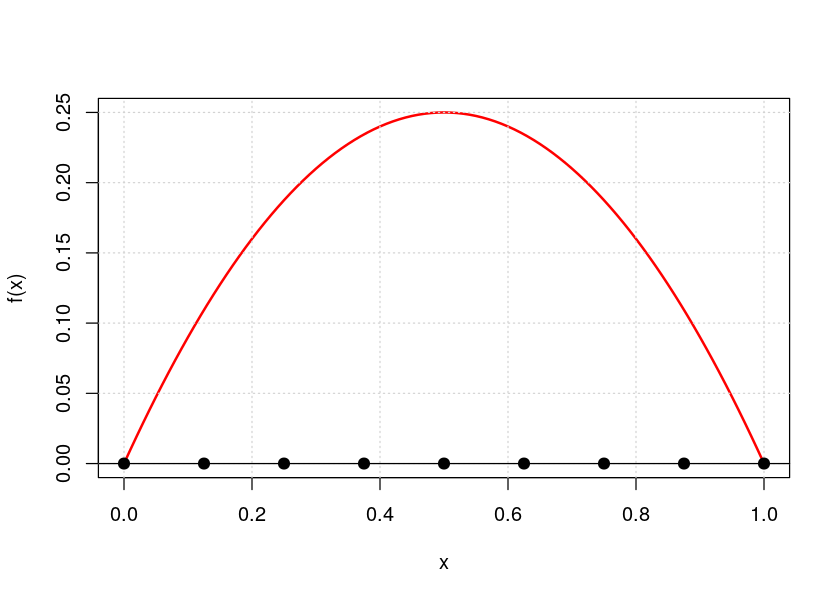

In [2]:
require(repr)
options(repr.plot.width=7, repr.plot.height=5)

xteo <- seq(0,1,by=0.01) 
malha <- seq(0,1,by=0.125)

analitico1 <- function(x){
    f <- -x^2 + x
    return(f)
}

plot(xteo, analitico1(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(malha, rep(0,length(malha)), pch=19, cex=1.2)
abline(h=0)

Dividindo a barra em 9 nós (com índices de 0 a 8), sendo o primeiro nó e o nono nó localizados na extremidade, pode-se escrever o problema no formato discreto:

$$ \frac{-f_{i+1} + 2f_i - f_{i-1}}{(\Delta x)^2} = 2$$

ou no formato matricial:

\begin{equation*}
\frac{1}{(0,125)^2}\begin{bmatrix}
2 & -1 & 0 & \dots & 0 & 0 & 0 \\
-1 & 2 & -1 & \dots & 0 & 0 & 0 \\
0 & -1 & 2 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \dots & 0 & -1 & 2 
\end{bmatrix} \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_8 
\end{bmatrix} = \begin{bmatrix} 2 \\ 2 \\ 2 \\ \vdots \\ 2 
\end{bmatrix}
\end{equation*}

In [3]:
dx <- 0.125
K <- (1/dx^2)*toeplitz(c(2,-1,0,0,0,0,0))
b <- rep(2,7)
num1 <- solve(K,b)

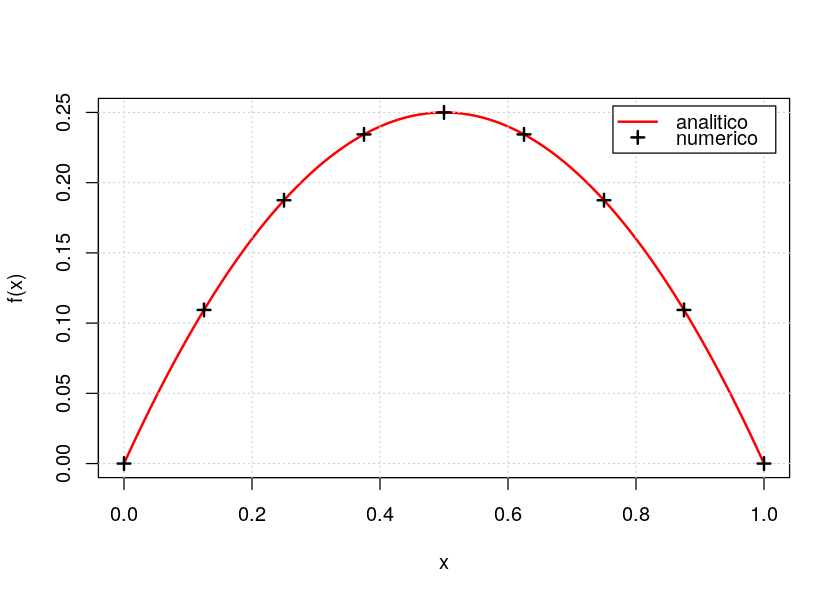

In [4]:
xnum <- seq(0,1,by=0.125)
plot(xteo, analitico1(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(xnum, c(0,num1,0), pch=3, lwd=2)
legend("topright", legend=c('analitico', 'numerico'), col=c(2,1), pch=c(NA,3),
      lty=c(1,NA), lwd=c(2,2), inset=0.02, bg='white')

### Livre-fixo


Vamos resolver o mesmo problema, mas mudando a condição de contorno do primeiro nó, tal que $\frac{df}{dx}(0) = 0$ e $f(1)=0$

Para este problema a solução analítica é $f(x) = -x^2 + 1$

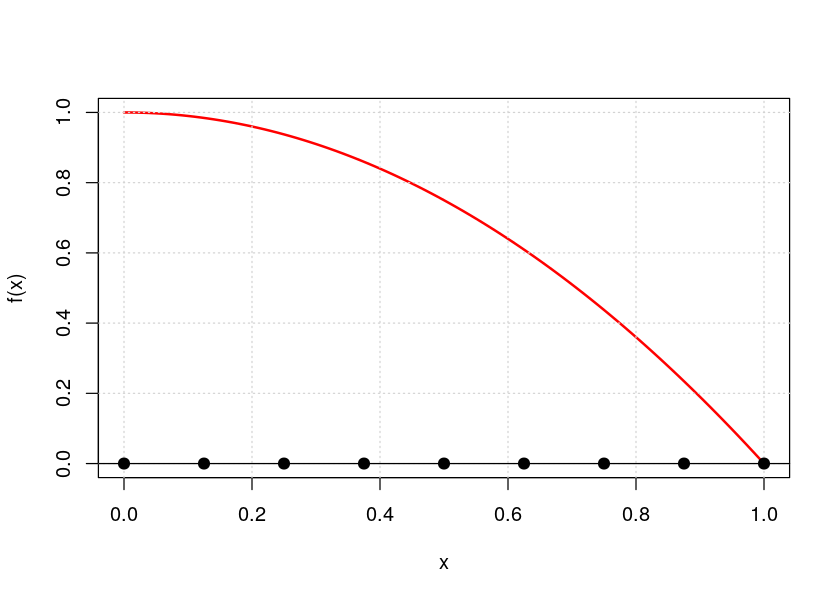

In [5]:
analitico2 <- function(x){
    f <- -x^2 + 1
    return(f)
}

plot(xteo, analitico2(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(malha, rep(0,length(malha)), pch=19, cex=1.2)
abline(h=0)

Como a condição de contorno do primeiro nó é dada por sua derivada, a primeira linha da matriz simétrica utilizada no caso de fixo-fixo precisa ser alterada. Aplicando uma aproximação de primeira ordem para a derivada, 

$$ \frac{f_1 - f_0}{\Delta x} = 0 \qquad logo \qquad f_1 = f_0 $$

e na primeira linha...

$$ \frac{-f_2 + 2f_1 - f_0}{(\Delta x)^2} =  \frac{-f_2 + 2f_1 - f_1}{(\Delta x)^2} = \frac{-f_2 + f_1}{(\Delta x)^2} = 2$$

ou no formato matricial:

\begin{equation*}
\frac{1}{(0,125)^2}\begin{bmatrix}
\color{red}{1} & \color{red}{-1} & \color{red}{0} & \dots & \color{red}{0} & \color{red}{0} & \color{red}{0} \\
-1 & 2 & -1 & \dots & 0 & 0 & 0 \\
0 & -1 & 2 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \dots & 0 & -1 & 2 
\end{bmatrix} \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_8 
\end{bmatrix} = \begin{bmatrix} 2 \\ 2 \\ 2 \\ \vdots \\ 2 
\end{bmatrix}
\end{equation*}

In [6]:
Ta <- toeplitz(c(2,-1,0,0,0,0,0))
Ta[1,1] <- 1
Ta <- (1/dx^2)*Ta
num2a <- solve(Ta,b)

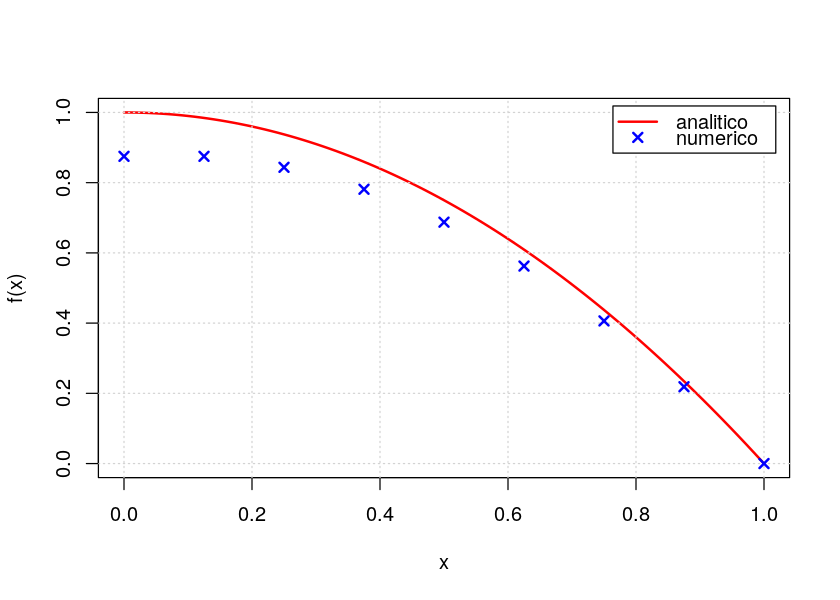

In [7]:
plot(xteo, analitico2(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(xnum, c(num2a[1],num2a,0), pch=4, lwd=2, col=4)
legend("topright", legend=c('analitico', 'numerico'), col=c(2,4), pch=c(NA,4),
      lty=c(1,NA), lwd=c(2,2), inset=0.02, bg='white')

Aproximação de primeira ordem para a ponta livre produz o erro de ordem $\Delta x$ que pode ser observado no gráfico. Para melhorar o resultado pode-se aplicar diferenças centradas.

$$ \frac{f_1 - f_{-1}}{2 \Delta x} = 0 \qquad logo \qquad f_1 = f_{-1} $$

A matriz terá uma linha adicional.

$$ \frac{-f_1+ 2f_0- f_{-1}}{\Delta x)^2} =  \frac{-2f_1 + 2f_0}{(\Delta x)^2} = 2$$

Para matriz manter a simeria, dividir a primeira linha por dois.

$$ \frac{-f_1 + f_0}{(\Delta x)^2} = 1$$

ou no formato matricial:

\begin{equation*}
\frac{1}{(0,125)^2}\begin{bmatrix}
\color{red}{1} & \color{red}{-1} & \color{red}{0} & \dots & \color{red}{0} & \color{red}{0} & \color{red}{0} \\
-1 & 2 & -1 & \dots & 0 & 0 & 0 \\
0 & -1 & 2 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \dots & 0 & -1 & 2 
\end{bmatrix} \begin{bmatrix} f_0 \\ f_1 \\ f_2 \\ \vdots \\ f_8 
\end{bmatrix} = \begin{bmatrix} \color{red}{1} \\ 2 \\ 2 \\ \vdots \\ 2 
\end{bmatrix}
\end{equation*}

In [8]:
Tb <- toeplitz(c(2,-1,0,0,0,0,0,0))
Tb[1,1] <- 1
Tb <- (1/dx^2)*Tb
bb <- c(1,b)
num2b <- solve(Tb,bb)

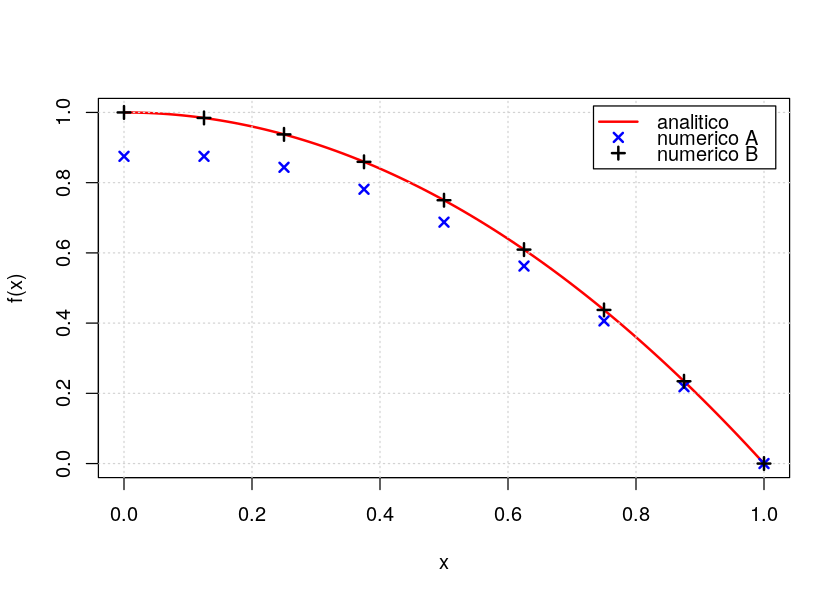

In [9]:
plot(xteo, analitico2(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(xnum, c(num2a[1],num2a,0), pch=4, lwd=2, col=4)
points(xnum, c(num2b,0), pch=3, lwd=2, col=1)
legend("topright", legend=c('analitico', 'numerico A', 'numerico B'), col=c(2,4,1), pch=c(NA,4,3),
      lty=c(1,NA,NA), lwd=c(2,2,2), inset=0.02, bg='white')